# Change Parameters

In [1]:
import pybamm

## Choosing an inbuilt parameter set

In [2]:
model = pybamm.lithium_ion.SPMe()

In [3]:
parameter_set = pybamm.parameter_sets.Chen2020
parameter_values = pybamm.ParameterValues(chemistry=parameter_set)

In [4]:
sim = pybamm.Simulation(model, parameter_values=parameter_values)

In [5]:
sim.solve()

In [6]:
sim.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=0.9797979797979798, step=0.05), Output()), _…

## Changing a single parameter

In [18]:
list(parameter_values.keys())  # change to a search function if possible

['Negative current collector thickness [m]',
 'Negative electrode thickness [m]',
 'Separator thickness [m]',
 'Positive electrode thickness [m]',
 'Positive current collector thickness [m]',
 'Electrode height [m]',
 'Electrode width [m]',
 'Negative tab width [m]',
 'Negative tab centre y-coordinate [m]',
 'Negative tab centre z-coordinate [m]',
 'Positive tab width [m]',
 'Positive tab centre y-coordinate [m]',
 'Positive tab centre z-coordinate [m]',
 'Negative current collector conductivity [S.m-1]',
 'Positive current collector conductivity [S.m-1]',
 'Negative current collector density [kg.m-3]',
 'Positive current collector density [kg.m-3]',
 'Negative current collector specific heat capacity [J.kg-1.K-1]',
 'Positive current collector specific heat capacity [J.kg-1.K-1]',
 'Negative current collector thermal conductivity [W.m-1.K-1]',
 'Positive current collector thermal conductivity [W.m-1.K-1]',
 'Cell capacity [A.h]',
 'Typical current [A]',
 'Negative electrode conductivi

### Change negative electrode diffusivity to a scalar value

In [8]:
parameter_values["Negative electrode diffusivity [m2.s-1]"]

3.3e-14

In [9]:
parameter_values["Negative electrode diffusivity [m2.s-1]"] = 5e-15

In [10]:
parameter_values["Negative electrode diffusivity [m2.s-1]"]

5e-15

In [11]:
sim_neg_diff = pybamm.Simulation(pybamm.lithium_ion.SPMe(), parameter_values=parameter_values)

In [12]:
sim_neg_diff.solve()

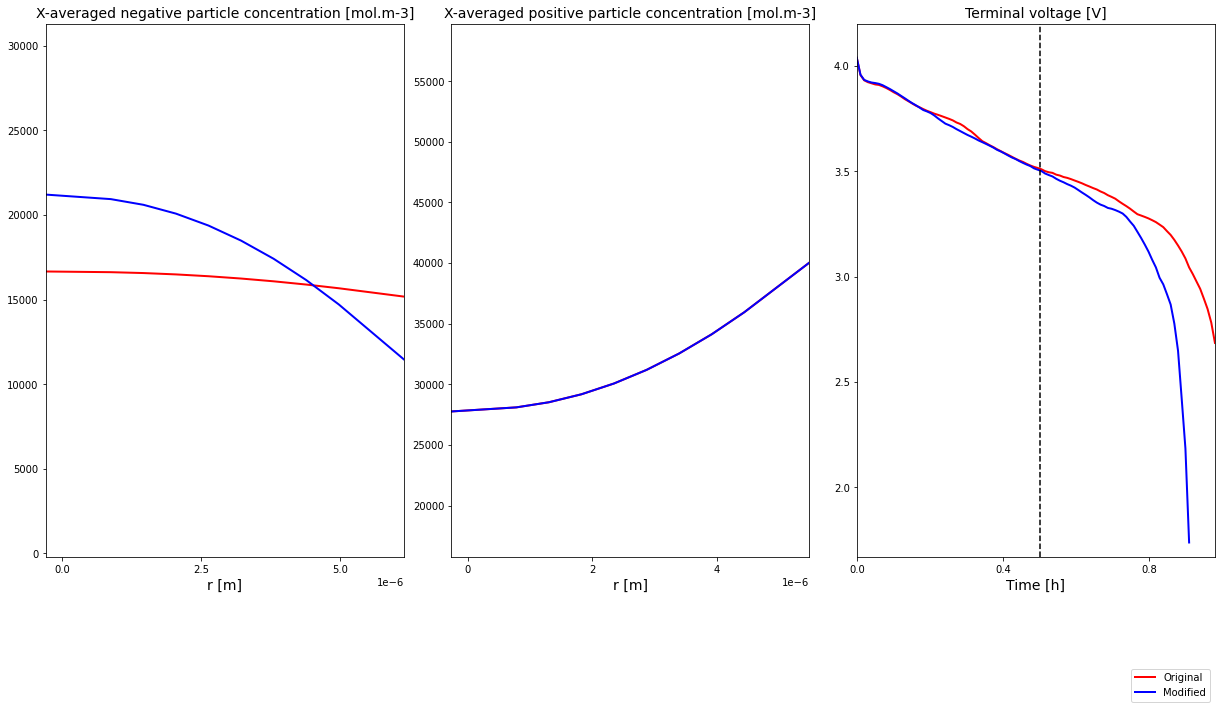

In [17]:
plot = pybamm.QuickPlot(
    [sim.solution, sim_neg_diff.solution],
    output_variables=[
        "X-averaged negative particle concentration [mol.m-3]",
        "X-averaged positive particle concentration [mol.m-3]",
        "Terminal voltage [V]"
    ],
    labels=["Original", "Modified"])
plot.plot(0.5)

### Change negative electrode diffusivity to a function of concentration

In [23]:
# we need to show people where to find out what the function inputs should be. Ideally without looking
# in the input folder 
def my_diff(sto, T, T_inf, E_D_s, R_g):
    return 5e-15 * (1 + sto)

In [24]:
parameter_values["Negative electrode diffusivity [m2.s-1]"] = my_diff

In [25]:
sim_diff_fun = pybamm.Simulation(pybamm.lithium_ion.SPMe(), parameter_values=parameter_values)

In [26]:
sim_diff_fun.solve()

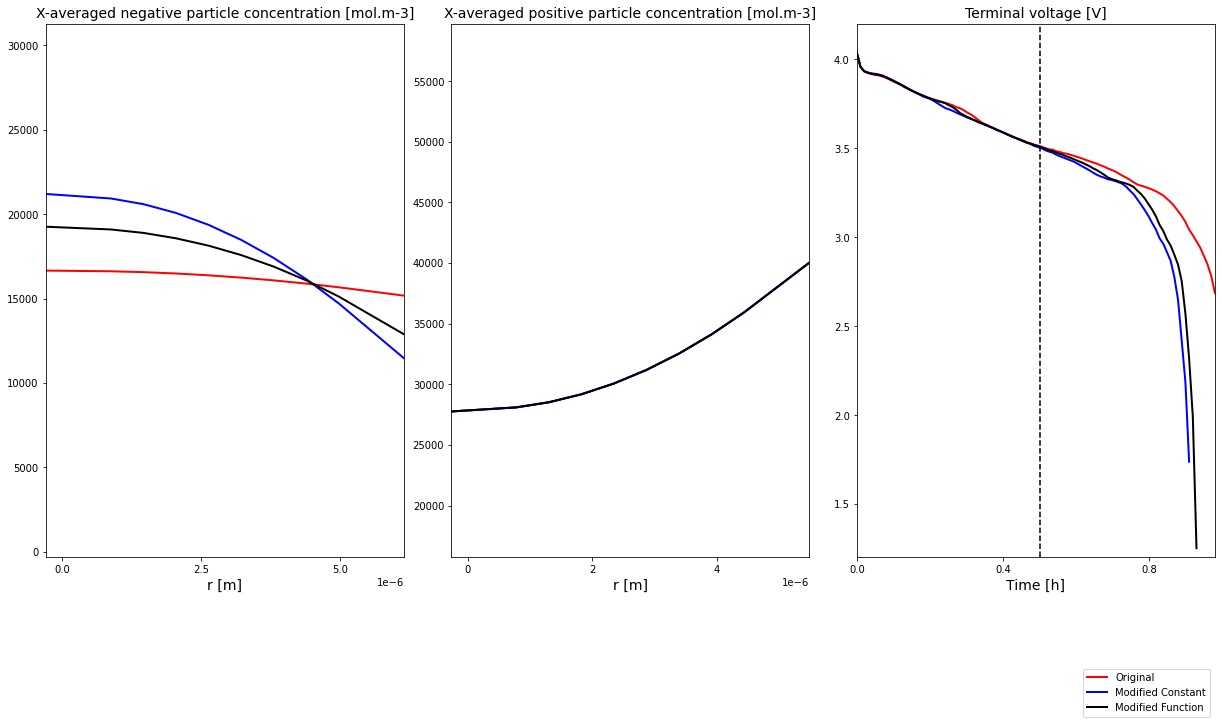

In [27]:
plot = pybamm.QuickPlot(
    [sim.solution, sim_neg_diff.solution, sim_diff_fun.solution],
    output_variables=[
        "X-averaged negative particle concentration [mol.m-3]",
        "X-averaged positive particle concentration [mol.m-3]",
        "Terminal voltage [V]"
    ],
    labels=["Original", "Modified Constant", "Modified Function"])
plot.plot(0.5)

## Adding a new parameter set